# Explore here

In [82]:

# Your code here
import os
import shutil
import random

lista_fotografias = os.listdir('../data/raw/train')

for fotografia in lista_fotografias:
    if not fotografia.endswith('.jpg'):
        continue
    if 'cat' in fotografia:
        #2 de cada 10 veces mover el archivo a processed/test/cat y 8 de cada 10 veces a processed/train/cat
        if random.random() < 0.2:
            destino = '../data/processed/test/cat'
        else:
            destino = '../data/processed/train/cat'
        shutil.move(os.path.join('../data/raw/train', fotografia), destino)
    elif 'dog' in fotografia:
        if random.random() < 0.2:
            destino = '../data/processed/test/dog'
        else:
            destino = '../data/processed/train/dog'
        shutil.move(os.path.join('../data/raw/train', fotografia), destino)
    else:
        print(f'Animal desconocido: {fotografia}')

In [83]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [93]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def resize_images(directory, size=(200, 200)):
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=size)
            img_array = img_to_array(img)
            # Guarda la imagen redimensionada
            save_img(img_path, img_array)

# Llama a la función para redimensionar las imágenes en los directorios especificados
# Crea los directorios si no existen
os.makedirs('./data/processed/train/cat', exist_ok=True)
os.makedirs('./data/processed/train/dog', exist_ok=True)
os.makedirs('./data/processed/test/cat', exist_ok=True)
os.makedirs('./data/processed/test/dog', exist_ok=True)

# Llama a la función para redimensionar las imágenes en los directorios especificados
resize_images('./data/processed/train/cat')
resize_images('./data/processed/train/dog')
resize_images('./data/processed/test/cat')
resize_images('./data/processed/test/dog')

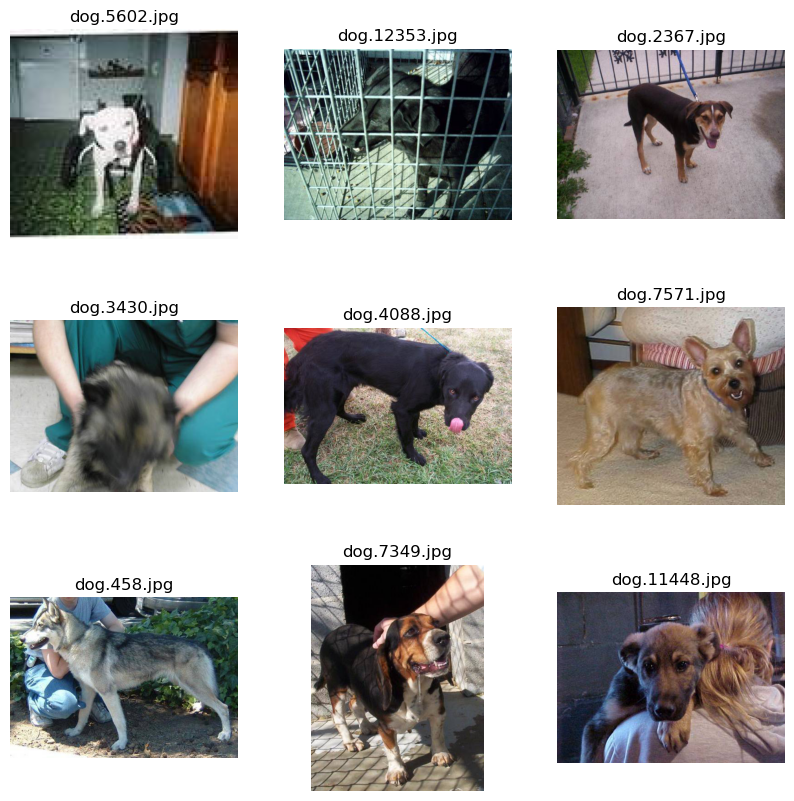

In [94]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img

plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = random.choice(os.listdir('../data/processed/train/dog'))
    img = load_img(os.path.join('../data/processed/train/dog', img_path))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(img_path.split('/')[-1])
    plt.axis('off')

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = random.choice(os.listdir('../data/processed/train/cat'))
    img = load_img(os.path.join('../data/processed/train/cat', img_path))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(img_path.split('/')[-1])
    plt.axis('off')

NotADirectoryError: [Errno 20] Not a directory: '../data/processed/train/cat'

<Figure size 1000x1000 with 0 Axes>

In [77]:
#mover los archivos de la carpeta test desde las subcarpetas dog y cat a la carpeta test

for subdir in ['cat', 'dog']:
    subdir_path = os.path.join('../data/processed/test', subdir)
    for filename in os.listdir(subdir_path):
        if filename.endswith('.jpg'):
            src_path = os.path.join(subdir_path, filename)
            dest_path = os.path.join('../data/processed/test', filename)
            shutil.move(src_path, dest_path)

NotADirectoryError: [Errno 20] Not a directory: '../data/processed/test/cat'

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '../../data/processed/train'
test_dir = '../../data/processed/test'

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrain.flow_from_directory(train_dir
                                                target_size=(200, 200),
                                                batch_size=32,
                                                classes= ['cat', 'dog']

train_data = datagentest.flow_from_directory(test_dir
                                                target_size=(200, 200),
                                                batch_size=32,
                                                classes= ['test']     


SyntaxError: invalid syntax (936038290.py, line 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling

model = Sequential()
model.add(Rescaling(1./255, input_shape=(200, 200, 3)))

proyecto de mario

https://github.com/mfvilches/deep_learning_project